### Loading data_train.csv

In [3]:
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving cleaned_subreddits.csv to cleaned_subreddits.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['cleaned_subreddits.csv']))
docs = data['clean_title']
docs=docs.astype(str)
data

,Unnamed: 0,clean_title,is_onion
0,0,maria butina pleads guilty russian scheme infl...,1
1,1,drew brees said,1
2,2,ryan zinke apologizes misuse government funds ...,1
3,3,report mixxxx,1
4,4,trump administration launches human rights inv...,1
...,...,...,...
19995,19995,pastor attempting walk water like jesus eaten ...,0
19996,19996,bomb suspect cash strapped ex stripper devoted...,0
19997,19997,woman ran man lying road mistook scarecrow jailed,0
19998,19998,french company thought involved super smash br...,0


In [5]:
max_words = 1000
num_classes = 2
tokenizer = Tokenizer(num_words=max_words)
#we specify the num of words to use based on top n most frequent words
tokenizer.fit_on_texts(docs)
X = tokenizer.texts_to_matrix(docs, mode='tfidf')
#recall term frequency–inverse document frequency is intended to reflect how important a word is to a document in a collection or corpus
y = data['is_onion'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle =True, random_state=4222)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (16000, 1000), X_test shape (4000, 1000), y_train shape (16000, 2), y_test shape (4000, 2)


### Keras Model Tuning using scikit_learn

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### Part 1: Tune Batch Size and Number of Epochs

In [ ]:
def create_model():
    model = Sequential()
    
    model.add(Dense(512, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(512, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn=create_model)
batch_sizes = [10, 20, 50, 80]
epochs = [5, 10, 15]
parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

1280/1280 [==============================] - 11s 8ms/step - loss: 0.2943 - accuracy: 0.8988
Epoch 5/5
320/320 [==============================] - 1s 2ms/step - loss: 0.5937 - accuracy: 0.8194
Epoch 1/5
1280/1280 [==============================] - 10s 8ms/step - loss: 0.5049 - accuracy: 0.7827
Epoch 2/5
1280/1280 [==============================] - 10s 8ms/step - loss: 0.4080 - accuracy: 0.8369
Epoch 3/5
1280/1280 [==============================] - 10s 7ms/step - loss: 0.3567 - accuracy: 0.8688
Epoch 4/5
1280/1280 [==============================] - 10s 8ms/step - loss: 0.2897 - accuracy: 0.9048
Epoch 5/5
320/320 [==============================] - 1s 2ms/step - loss: 0.7142 - accuracy: 0.8078
Epoch 1/5
1280/1280 [==============================] - 10s 8ms/step - loss: 0.4991 - accuracy: 0.7839
Epoch 2/5
1280/1280 [==============================] - 10s 7ms/step - loss: 0.4069 - accuracy: 0.8371
Epoch 3/5
1280/1280 [==============================] - 10s 7ms/step - loss: 0.3516 - accuracy: 0.8

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a6cb93d30>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 50, 80], 'epochs': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Epoch 1/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.5099 - accuracy: 0.7716
Epoch 2/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.4112 - accuracy: 0.8374
Epoch 3/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.3634 - accuracy: 0.8670
Epoch 4/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2896 - accuracy: 0.9052
Epoch 5/5
320/320 [==============================] - 1s 2ms/step - loss: 0.6064 - accuracy: 0.8238
Epoch 1/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.5048 - accuracy: 0.7866
Epoch 2/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.4101 - accuracy: 0.8366
Epoch 3/5
1280/1280 [==============================] - 10s 8ms/step - loss: 0.3563 - accuracy: 0.8677
Epoch 4/5
1280/1280 [==============================] - 9s 7ms/step - loss: 0.2847 - accuracy: 0.9041
Epoch 5/5
320/320 [==============================] - 1s 3ms/step - loss: 0.6229 - accuracy: 

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a633db2e8>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 50, 80], 'epochs': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8185000061988831 {'batch_size': 10, 'epochs': 5}
0.8148124814033508 {'batch_size': 10, 'epochs': 10}
0.8135624885559082 {'batch_size': 10, 'epochs': 15}
0.8146875023841857 {'batch_size': 20, 'epochs': 5}
0.8159374833106995 {'batch_size': 20, 'epochs': 10}
0.8154375076293945 {'batch_size': 20, 'epochs': 15}
0.8183125019073486 {'batch_size': 50, 'epochs': 5}
0.8162500023841858 {'batch_size': 50, 'epochs': 10}
0.8192500114440918 {'batch_size': 50, 'epochs': 15}
0.8174999952316284 {'batch_size': 80, 'epochs': 5}
0.8191249966621399 {'batch_size': 80, 'epochs': 10}
0.8218125104904175 {'batch_size': 80, 'epochs': 15}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.8218125104904175 {'batch_size': 80, 'epochs': 15}


### Part 2: Tune the Training Optimization Algorithm

In [ ]:
def create_model(optimizer):
    model = Sequential()
    
    model.add(Dense(512, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(512, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=80)
parameters = {'optimizer':['SGD', 'RMSprop','Adam', 'Adamax']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/15
160/160 [==============================] - 2s 12ms/step - loss: 0.8063 - accuracy: 0.5657
Epoch 2/15
160/160 [==============================] - 2s 11ms/step - loss: 0.7888 - accuracy: 0.6372
Epoch 3/15
160/160 [==============================] - 2s 11ms/step - loss: 0.7703 - accuracy: 0.6844
Epoch 4/15
160/160 [==============================] - 2s 11ms/step - loss: 0.7488 - accuracy: 0.7143
Epoch 5/15
160/160 [==============================] - 2s 11ms/step - loss: 0.7231 - accuracy: 0.7385
Epoch 6/15
160/160 [==============================] - 2s 11ms/step - loss: 0.6935 - accuracy: 0.7561
Epoch 7/15
160/160 [==============================] - 2s 11ms/step - loss: 0.6614 - accuracy: 0.7682
Epoch 8/15
160/160 [==============================] - 2s 11ms/step - loss: 0.6293 - accuracy: 0.7791
Epoch 9/15
160/160 [==============================] - 2s 11ms/step - loss: 0.5995 - accuracy: 0.7886
Epoch 10/15
160/160 [==============================] - 2s 11ms/step - loss: 0.5733 - accura

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a6219e9b0>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adam', 'Adamax']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8001875042915344 {'optimizer': 'SGD'}
0.8164374828338623 {'optimizer': 'RMSprop'}
0.8215000033378601 {'optimizer': 'Adam'}
0.818624985218048 {'optimizer': 'Adamax'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.8215000033378601 {'optimizer': 'Adam'}


### Part 3: Tune Learning Rate and Momentum

Adam is an adaptive learning rate method which takes away the need to adjust learning rate, and does it automatically. Therefore we do not tune our learning rate.

### Part 4: Tune Network Weight Initialization

In [ ]:
def create_model(init_mode='uniform'):
    model = Sequential()
    
    model.add(Dense(512, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(512, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=80)
parameters = {'init_mode':['uniform', 'lecun_uniform', 'normal','glorot_uniform']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/15
160/160 [==============================] - 2s 13ms/step - loss: 0.4979 - accuracy: 0.7747
Epoch 2/15
160/160 [==============================] - 2s 13ms/step - loss: 0.3621 - accuracy: 0.8516
Epoch 3/15
160/160 [==============================] - 2s 13ms/step - loss: 0.2892 - accuracy: 0.8861
Epoch 4/15
160/160 [==============================] - 2s 13ms/step - loss: 0.2207 - accuracy: 0.9185
Epoch 5/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1710 - accuracy: 0.9413
Epoch 6/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1480 - accuracy: 0.9555
Epoch 7/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1353 - accuracy: 0.9589
Epoch 8/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1251 - accuracy: 0.9620
Epoch 9/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1211 - accuracy: 0.9643
Epoch 10/15
160/160 [==============================] - 2s 13ms/step - loss: 0.1384 - accura

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a5938e668>,
             iid='deprecated', n_jobs=None,
             param_grid={'init_mode': ['uniform', 'lecun_uniform', 'normal',
                                       'glorot_uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8166875123977662 {'init_mode': 'uniform'}
0.8180000066757203 {'init_mode': 'lecun_uniform'}
0.8191874980926513 {'init_mode': 'normal'}
0.8176874876022339 {'init_mode': 'glorot_uniform'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.8191874980926513 {'init_mode': 'normal'}


### Part 5: Tune the Neuron Activation Function

In [ ]:
def create_model(activation):
    model = Sequential()
    
    model.add(Dense(512, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' ,activation=activation))
    model.add(Dense(512, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' ,activation=activation))
    
    #Note we leave activation for output as sigmoid as we want the probabilities for a binary output label
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001),activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=80)
parameters = {'activation':['softmax', 'softplus','relu', 'tanh', 'sigmoid']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/15
160/160 [==============================] - 3s 16ms/step - loss: 0.7326 - accuracy: 0.4982
Epoch 2/15
160/160 [==============================] - 4s 22ms/step - loss: 0.6935 - accuracy: 0.4951
Epoch 3/15
160/160 [==============================] - 4s 23ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 4/15
160/160 [==============================] - 3s 19ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 5/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.4974
Epoch 6/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.4943
Epoch 7/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.4941
Epoch 8/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 9/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 10/15
160/160 [==============================] - 2s 13ms/step - loss: 0.6932 - accura

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a5bd8b8d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['softmax', 'softplus', 'relu', 'tanh',
                                        'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.49612500667572024 {'activation': 'softmax'}
0.8041874885559082 {'activation': 'softplus'}
0.8173749804496765 {'activation': 'relu'}
0.815750002861023 {'activation': 'tanh'}
0.8028750061988831 {'activation': 'sigmoid'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.8173749804496765 {'activation': 'relu'}


### Part 6: Tune Dropout Regularization

In [ ]:
from keras.constraints import maxnorm
def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    
    model.add(Dense(512, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint),kernel_initializer='normal' , activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint), kernel_initializer='normal' ,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=80)
parameters = {'dropout_rate':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'weight_constraint':[1, 2, 3, 4, 5]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/15
160/160 [==============================] - 2s 15ms/step - loss: 0.5318 - accuracy: 0.7759
Epoch 2/15
160/160 [==============================] - 2s 15ms/step - loss: 0.3823 - accuracy: 0.8559
Epoch 3/15
160/160 [==============================] - 2s 15ms/step - loss: 0.3020 - accuracy: 0.8941
Epoch 4/15
160/160 [==============================] - 2s 15ms/step - loss: 0.2325 - accuracy: 0.9223
Epoch 5/15
160/160 [==============================] - 2s 15ms/step - loss: 0.1877 - accuracy: 0.9403
Epoch 6/15
160/160 [==============================] - 2s 15ms/step - loss: 0.1772 - accuracy: 0.9455
Epoch 7/15
160/160 [==============================] - 3s 16ms/step - loss: 0.1603 - accuracy: 0.9522
Epoch 8/15
160/160 [==============================] - 3s 16ms/step - loss: 0.1497 - accuracy: 0.9561
Epoch 9/15
160/160 [==============================] - 3s 16ms/step - loss: 0.1338 - accuracy: 0.9616
Epoch 10/15
160/160 [==============================] - 3s 16ms/step - loss: 0.1328 - accura

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8213124990463256 {'dropout_rate': 0.0, 'weight_constraint': 1}
0.8197500109672546 {'dropout_rate': 0.0, 'weight_constraint': 2}
0.8192499876022339 {'dropout_rate': 0.0, 'weight_constraint': 3}
0.8207499980926514 {'dropout_rate': 0.0, 'weight_constraint': 4}
0.817562484741211 {'dropout_rate': 0.0, 'weight_constraint': 5}
0.821875 {'dropout_rate': 0.1, 'weight_constraint': 1}
0.8219374895095826 {'dropout_rate': 0.1, 'weight_constraint': 2}
0.8208124995231628 {'dropout_rate': 0.1, 'weight_constraint': 3}
0.8213125109672547 {'dropout_rate': 0.1, 'weight_constraint': 4}
0.8195000052452087 {'dropout_rate': 0.1, 'weight_constraint': 5}
0.8230000019073487 {'dropout_rate': 0.2, 'weight_constraint': 1}
0.8199375033378601 {'dropout_rate': 0.2, 'weight_constraint': 2}
0.8198125004768372 {'dropout_rate': 0.2, 'weight_constraint': 3}
0.8209375023841858 {'dropout_rate': 0.2, 'weight_constraint': 4}
0.8209374904632568 {'dropout_rate': 0.2, 'weight_constraint': 5}
0.8224999904632568 {'dropout_rate': 

In [ ]:
print(clf.best_score_, clf.best_params_)

0.8277500033378601 {'dropout_rate': 0.5, 'weight_constraint': 4}


### Part 7: Tune the Number of Neurons in the Hidden Layer

In [ ]:
def create_model(neurons):
    model = Sequential()
    
    model.add(Dense(neurons, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' , activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(neurons, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' ,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=80)
parameters = {'neurons':[50, 100, 200, 300, 400, 500]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/15
160/160 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6510
Epoch 2/15
160/160 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7991
Epoch 3/15
160/160 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8339
Epoch 4/15
160/160 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8394
Epoch 5/15
160/160 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8555
Epoch 6/15
160/160 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8650
Epoch 7/15
160/160 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8718
Epoch 8/15
160/160 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8778
Epoch 9/15
160/160 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.8828
Epoch 10/15
160/160 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.8914

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0a50783c50>,
             iid='deprecated', n_jobs=None,
             param_grid={'neurons': [50, 100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8226874947547913 {'neurons': 50}
0.8231250047683716 {'neurons': 100}
0.8245625019073486 {'neurons': 200}
0.8280625104904175 {'neurons': 300}
0.823562502861023 {'neurons': 400}
0.8270000100135804 {'neurons': 500}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.8280625104904175 {'neurons': 300}


### Evaluating our final tuned model

In [15]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:

finalmodel = Sequential()

finalmodel.add(Dense(300, input_shape=(max_words,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' , activation='relu'))
finalmodel.add(Dropout(0.5))
finalmodel.add(Dense(300, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='normal' ,activation='relu'))
finalmodel.add(Dropout(0.5))
finalmodel.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m])
finalmodel.summary()
    
#history = finalmodel.fit(X_train, y_train, batch_size=80, epochs = 15, verbose=1)

#score = finalmodel.evaluate(X_test, y_test, batch_size = 80, verbose = 1)

#print("Test accuracy after tuning is {}".format(score[1]))
#test validation accuracy ouput of over 0.9

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               300300    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 602       
Total params: 391,202
Trainable params: 391,202
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = finalmodel.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 80,  verbose = 1)

score = finalmodel.evaluate(X_test, y_test, batch_size = 80, verbose = 1)

loss, accuracy, f1_score, precision, recall = finalmodel.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test recall is {}".format(recall))

Epoch 1/15
200/200 [==============================] - 2s 9ms/step - loss: 0.5744 - accuracy: 0.7408 - f1_m: 0.7348 - precision_m: 0.7357 - recall_m: 0.7345 - val_loss: 0.4513 - val_accuracy: 0.8158 - val_f1_m: 0.8146 - val_precision_m: 0.8159 - val_recall_m: 0.8132
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.4336 - accuracy: 0.8270 - f1_m: 0.8270 - precision_m: 0.8267 - recall_m: 0.8274 - val_loss: 0.4402 - val_accuracy: 0.8207 - val_f1_m: 0.8212 - val_precision_m: 0.8219 - val_recall_m: 0.8205
Epoch 3/15
200/200 [==============================] - 2s 8ms/step - loss: 0.3895 - accuracy: 0.8508 - f1_m: 0.8499 - precision_m: 0.8504 - recall_m: 0.8494 - val_loss: 0.4358 - val_accuracy: 0.8250 - val_f1_m: 0.8248 - val_precision_m: 0.8252 - val_recall_m: 0.8245
Epoch 4/15
200/200 [==============================] - 2s 8ms/step - loss: 0.3551 - accuracy: 0.8678 - f1_m: 0.8673 - precision_m: 0.8672 - recall_m: 0.8675 - val_loss: 0.4449 - val_accuracy: 0.8285 - va

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

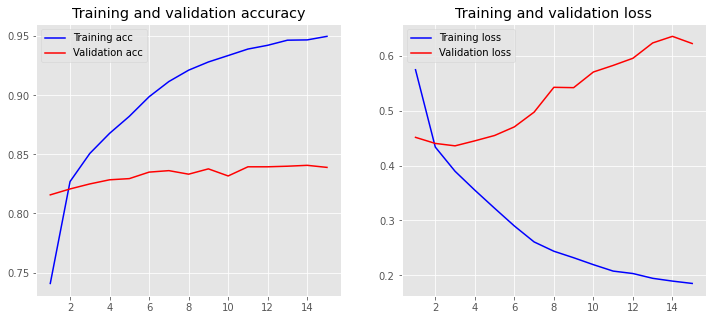

In [19]:
plot_history(history)

CNN attempt

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [28]:
max_words = 1000
batch_size = 15
epochs = 5
embedding_dim = 10
maxlen = 100
x_train = sequence.pad_sequences(X_train, maxlen=max_words)
x_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [29]:
modelcnn = Sequential()
modelcnn.add(Embedding(maxlen, 32, input_length=max_words))
modelcnn.add(Conv1D(32, 3, padding='same', activation='relu', kernel_regularizer = regularizers.l2(0.0001)))
modelcnn.add(MaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(300,kernel_regularizer = regularizers.l2(0.0001),kernel_initializer='normal', activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(2, kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
modelcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy', f1_m, precision_m, recall_m])
modelcnn.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          3200      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               4800300   
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                

In [30]:
history2 = modelcnn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size,  verbose = 2)

score2 = modelcnn.evaluate(x_test, y_test, batch_size = batch_size, verbose = 0)

loss, accuracy, f1_score, precision, recall = modelcnn.evaluate(x_test, y_test, verbose=0)

print("Test accuracy is {}".format(score2[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test recall is {}".format(recall))

Epoch 1/5
1067/1067 - 75s - loss: 0.6456 - accuracy: 0.7424 - f1_m: 0.7411 - precision_m: 0.7414 - recall_m: 0.7421 - val_loss: 0.5261 - val_accuracy: 0.7997 - val_f1_m: 0.7993 - val_precision_m: 0.7999 - val_recall_m: 0.7990
Epoch 2/5
1067/1067 - 75s - loss: 0.5059 - accuracy: 0.8021 - f1_m: 0.8004 - precision_m: 0.8009 - recall_m: 0.8004 - val_loss: 0.4950 - val_accuracy: 0.8070 - val_f1_m: 0.8059 - val_precision_m: 0.8061 - val_recall_m: 0.8059
Epoch 3/5
1067/1067 - 75s - loss: 0.4695 - accuracy: 0.8199 - f1_m: 0.8199 - precision_m: 0.8204 - recall_m: 0.8198 - val_loss: 0.4799 - val_accuracy: 0.8135 - val_f1_m: 0.8138 - val_precision_m: 0.8130 - val_recall_m: 0.8147
Epoch 4/5
1067/1067 - 74s - loss: 0.4329 - accuracy: 0.8399 - f1_m: 0.8392 - precision_m: 0.8397 - recall_m: 0.8391 - val_loss: 0.4708 - val_accuracy: 0.8192 - val_f1_m: 0.8190 - val_precision_m: 0.8202 - val_recall_m: 0.8180
Epoch 5/5
1067/1067 - 74s - loss: 0.4003 - accuracy: 0.8586 - f1_m: 0.8582 - precision_m: 0.8589

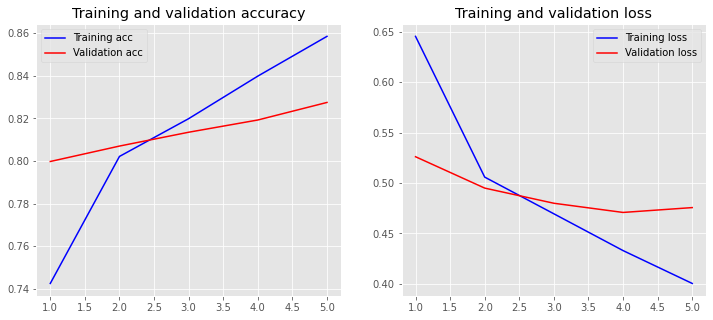

In [31]:
plot_history(history2)

RNN atempt

In [ ]:
def recurrent_nn(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    #lstm = LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embedded_sequences)
    lstm = (LSTM(800, dropout=0.5)(embedded_sequences))
    
    x = Dense(512, activation='relu')(lstm)
    x = Dropout(0.3)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
model = recurrent_nn(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

In [ ]:
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

In [ ]:
plot_history(history)